### Import all needed libraries

In [2]:
from skimpy import skim
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None) #showing all cols

### Reading Files

In [4]:
fl18=pd.read_csv('state_FL 18.csv')
fl19=pd.read_csv('state_FL 19.csv')
fl20=pd.read_csv('state_FL 20.csv')
fl21=pd.read_csv('state_FL 21.csv')
fl22=pd.read_csv('state_FL 22.csv')
fl23=pd.read_csv('state_FL 23.csv')

C:\Users\hawra\AppData\Local\Temp\ipykernel_14676\2076110188.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  fl18=pd.read_csv('state_FL 18.csv')
C:\Users\hawra\AppData\Local\Temp\ipykernel_14676\2076110188.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  fl19=pd.read_csv('state_FL 19.csv')
C:\Users\hawra\AppData\Local\Temp\ipykernel_14676\2076110188.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  fl20=pd.read_csv('state_FL 20.csv')
C:\Users\hawra\AppData\Local\Temp\ipykernel_14676\2076110188.py:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  fl21=pd.read_csv('state_FL 21.csv')
C:

### Concating Files

In [5]:
df=pd.concat([fl18, fl19, fl20, fl21,fl22,fl23], ignore_index=True)

### Exploaring the data 

In [6]:
df.shape

(6471910, 99)

### Drop unnecessary cols

In [7]:
df = df.drop(columns=['co-applicant_race-2', 'co-applicant_race-3', 'co-applicant_race-4','co-applicant_race-5'])
df = df.drop(columns=['applicant_race-2', 'applicant_race-3', 'applicant_race-4','applicant_race-5'])
df = df.drop(columns=['total_points_and_fees'])
df = df.drop(columns=['applicant_race-1', 'co-applicant_race-1'])
df = df.drop(columns=['applicant_race_observed','co-applicant_race_observed'])
df = df.drop(columns=['applicant_sex_observed','co-applicant_sex_observed'])
df = df.drop(columns=['applicant_age_above_62','co-applicant_age_above_62'])
df = df.drop(columns=['aus-1','aus-2','aus-3','aus-4','aus-5'])
df = df.drop(columns=[ 'construction_method',  'manufactured_home_secured_property_type','manufactured_home_land_property_interest'])
df = df.drop(columns=['co-applicant_ethnicity-1','co-applicant_ethnicity-2','co-applicant_ethnicity-3','co-applicant_ethnicity-4',
                      'co-applicant_ethnicity-5'])
df = df.drop(columns=['applicant_ethnicity-1','applicant_ethnicity-2','applicant_ethnicity-3','applicant_ethnicity-4','applicant_ethnicity-5'])
df = df.drop(columns=['state_code', 'census_tract']) 
df = df.drop(columns=['tract_population','reverse_mortgage'])
df = df.drop(columns=['derived_msa-md','purchaser_type','purchaser_type','balloon_payment', 'interest_only_payment'])
df = df.drop(columns=['submission_of_application'])
df = df.drop(columns=['derived_ethnicity','derived_race','multifamily_affordable_units'])
df=df.drop(columns=['applicant_credit_score_type','co-applicant_credit_score_type'])
df=df.drop(columns=['applicant_ethnicity_observed','co-applicant_ethnicity_observed'])
df=df.drop(columns=['co-applicant_sex','co-applicant_age','initially_payable_to_institution','tract_minority_population_percent'])
df=df.drop(columns=['ffiec_msa_md_median_family_income','tract_to_msa_income_percentage','tract_owner_occupied_units','tract_one_to_four_family_homes','tract_median_age_of_housing_units'])

In [8]:
df.shape

(6471910, 39)

In [9]:
df.sample(4)

,activity_year,lei,county_code,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_sex,action_taken,preapproval,loan_type,loan_purpose,lien_status,open-end_line_of_credit,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,other_nonamortizing_features,property_value,occupancy_type,total_units,income,debt_to_income_ratio,applicant_sex,applicant_age,denial_reason-1,denial_reason-2,denial_reason-3,denial_reason-4
1146370,2018,KB1H1DSPRFMYMCUFXT09,12071.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Joint,2.0,2.0,1.0,4.0,1.0,1.0,2.0,35000.0,15.38,8.125,3.265,3.0,NaN,NaN,NaN,NaN,361,36.0,NaN,2.0,2.0,195000.0,1.0,1,32.0,30%-<36%,1.0,45-54,10.0,NaN,NaN,NaN
4201349,2021,WKN6AF1FCL7BBYGTGI83,12015.0,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Female,1.0,2.0,2.0,1.0,1.0,2.0,2.0,155000.0,96.5,3.25,1.174,2.0,5028.78,0.0,NaN,3392.86,360,NaN,NaN,2.0,2.0,165000,1.0,1,40.0,36,2.0,55-64,10.0,NaN,NaN,NaN
1860100,2019,7E1PDLW1JL6TS0BS1G03,12117.0,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Male,3.0,2.0,1.0,4.0,2.0,1.0,2.0,125000.0,69.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,360,NaN,1.0,2.0,2.0,345000.0,1.0,1,200.0,42,1.0,65-74,3.0,NaN,NaN,NaN
1461174,2019,549300HW662MN1WU8550,12011.0,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Male,1.0,2.0,1.0,1.0,1.0,2.0,2.0,375000.0,95.0,3.798,0.237,2.0,7733.0,3745.0,NaN,5302.86,360,NaN,NaN,2.0,2.0,405000,1.0,1,84.0,39,1.0,35-44,10.0,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471910 entries, 0 to 6471909
Data columns (total 39 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   activity_year                   int64  
 1   lei                             object 
 2   county_code                     float64
 3   conforming_loan_limit           object 
 4   derived_loan_product_type       object 
 5   derived_dwelling_category       object 
 6   derived_sex                     object 
 7   action_taken                    float64
 8   preapproval                     float64
 9   loan_type                       float64
 10  loan_purpose                    float64
 11  lien_status                     float64
 12  open-end_line_of_credit         float64
 13  business_or_commercial_purpose  float64
 14  loan_amount                     float64
 15  loan_to_value_ratio             object 
 16  interest_rate                   object 
 17  rate_spread                

### Checking nulls in important cols that can't filled

In [13]:
df['loan_amount'].isnull().sum()

2

In [14]:
df['action_taken'].isnull().sum()

2

In [15]:
df['loan_purpose'].isnull().sum()

2

In [16]:
df['loan_purpose'].isnull().sum()

2

In [17]:
df['income'].isnull().sum()

859266

### Checking the number of nulls in income in each year
- Then checking by %

In [18]:
df.groupby([df['income'].isnull(), 'activity_year']).size().sort_index()

income  activity_year
False   2018             1027013
        2019             1127594
        2020             1303215
        2021              269167
        2022             1231685
        2023              653970
True    2018              132789
        2019              163781
        2020              247929
        2021               50773
        2022              154196
        2023              109798
dtype: int64

In [19]:
 df.groupby('activity_year')['income'].apply(
    lambda x: x.isnull().value_counts(normalize=True)
).unstack() * 100 

2018,False,True
activity_year,,
2018,88.550718,11.449282
2019,87.317317,12.682683
2020,84.016378,15.983622
2021,84.130462,15.869538
2022,88.873792,11.126208
2023,85.624169,14.375831


### Drop nulls in cols that can't be filled

In [20]:
df = df.dropna(subset=['loan_amount', 'loan_purpose', 'action_taken', 'income','loan_type'])

### Checking zeros in income to insure that nulls doesn't mean that income is zero
- Then double checking in each row

In [21]:
(df['income'] == 0).sum()

82787

### Multiplying income by 1000

In [22]:
df['income_dollars'] = df['income'] * 1000

### Creating Dictionaries

In [23]:
action_taken_dict = {
    1: "Loan originated",
    2: "Application approved but not accepted",
    3: "Application denied",
    4: "Application withdrawn by applicant",
    5: "File closed for incompleteness",
    6: "Purchased loan",
    7: "Preapproval request denied",
    8: "Preapproval request approved but not accepted"
}
df['action_taken_d'] = df['action_taken'].map(action_taken_dict)


In [24]:
(df['loan_purpose']==5).sum()

6400

In [25]:
loan_type_dict = {
    1:"Conventional",
     2:"FHA",
    3:"VA",
    4:"USDA"
}
df['loan_type_d'] = df['loan_type'].map(loan_type_dict)


In [26]:
loan_pr_dict = {
    1:"Home purchase",
    2: "Home improvement",
    31: "Refinancing",
    32: "Cash-out refinancing",
    4: "Other purpose",
    5: "Not applicable"
}
df['loan_purpose_d'] = df['loan_purpose'].map(loan_pr_dict)


In [27]:
limit_dict = {
    'C':'Conforming',
   'NC': 'Nonconforming',
    'U':'Undetermined'}

df['conforming_loan_limit_d'] = df['conforming_loan_limit'].map(limit_dict)


In [28]:
credit_dic = {
    1 :'Open-end line',
    2 :'Not an open-end line',
    1111 :'Exempt'}

df['credit_line_d'] = df['open-end_line_of_credit'].map(credit_dic)


In [29]:
bs_dic = {
    1 :'Primarily ',
    2 :'Not primarily ',
    1111 :'Exempt'}

df['business_purpose_d'] = df['business_or_commercial_purpose'].map(bs_dic)


In [30]:
ho_dic = {
    1 :'High-cost mortgage',
2:'Not a high-cost mortgage',
3:'Not applicable'}

df['hoepa_status_d'] = df['hoepa_status'].map(ho_dic)


In [31]:
ocp_dic = {
   1 :'Principal residence',
2:'Second residence',
3: 'Investment property'}

df['occupancy_type_d'] = df['occupancy_type'].map(ocp_dic)


In [32]:
sex_dic = {
   1:'Male',
2: 'Female',
3: 'Other',
4 :'Other',
6:'Other'}

df['applicant_sex_d'] = df['applicant_sex'].map(sex_dic)


In [87]:
den_dic = {
   1 :'Debt-to-income ratio',
2 : 'Employment history',
3 :'Credit history',
4 : 'Collateral',
5 : 'Insufficient cash',
6 : 'Unverifiable information',
7 : 'Credit application incomplete',
8: 'Mortgage insurance denied',
9 : 'Other'}

df['denial_reason'] = df['denial_reason-1'].map(den_dic)

In [89]:
df['is_denied']=df['denial_reason'].notna()

### Cleaning the interest rate by changeing "Exempt" to null and then fixing the data type
- Fixing misstyped interest rate ( > 100%,etc )

In [38]:
df['interest_rate'] = df['interest_rate'].replace('Exempt', np.nan)
df['interest_rate'] = pd.to_numeric(df['interest_rate'], errors='coerce')

In [39]:
df.loc[df['interest_rate'] > 1000, 'interest_rate'] = df['interest_rate'] / 1000
df.loc[df['interest_rate'] > 100, 'interest_rate'] = df['interest_rate'] / 100
df.loc[df['interest_rate'] > 40, 'interest_rate'] = df['interest_rate'] / 10

### Filling the nulls in interest rate by the median of interest rate in ( loantype,year )

In [40]:
df['interest_rate'] = (
    df.groupby(['activity_year', 'loan_type'])['interest_rate']
      .transform(lambda x: x.fillna(x.median()))
)

In [41]:
df.groupby(['activity_year', 'loan_purpose_d'])['interest_rate'].median()

activity_year  loan_purpose_d      
2018           Cash-out refinancing    4.875
               Home improvement        4.875
               Home purchase           4.875
               Not applicable          4.875
               Other purpose           4.875
               Refinancing             4.875
2019           Cash-out refinancing    4.375
               Home improvement        4.375
               Home purchase           4.375
               Not applicable          4.375
               Other purpose           4.375
               Refinancing             4.375
2020           Cash-out refinancing    3.250
               Home improvement        3.250
               Home purchase           3.250
               Not applicable          4.125
               Other purpose           3.250
               Refinancing             3.250
2021           Cash-out refinancing    3.000
               Home improvement        3.000
               Home purchase           3.000
               Not 

In [42]:
df.groupby(['activity_year', 'loan_purpose_d'])['interest_rate'].agg(['sum','min','max',"mean",'median'])

sum     min     max      mean  \
activity_year loan_purpose_d                                                 
2018          Cash-out refinancing  8.642193e+05  0.0036  38.645  4.808057   
              Home improvement      4.745393e+05  0.6800  12.900  5.203738   
              Home purchase         2.677596e+06  0.0010  15.625  4.857547   
              Not applicable        1.092435e+04  2.5400  11.800  4.844503   
              Other purpose         4.515781e+05  0.4900  13.000  5.059812   
              Refinancing           5.372576e+05  0.0500  13.130  4.739811   
2019          Cash-out refinancing  8.476904e+05  0.0000  35.000  4.305795   
              Home improvement      4.494312e+05  0.0000  12.750  5.027363   
              Home purchase         2.554639e+06  0.0000  35.000  4.366553   
              Not applicable        8.923396e+03  0.0000  10.000  4.397928   
              Other purpose         4.223748e+05  0.0000  12.410  4.856389   
              Refinancing           7.051987e+05  0.0000  11.630  4.215779   
2020          Cash-out refinancing  6.647615e+05  0.0000  12.990  3.303261   
              Home improvement      2.299214e+05  0.0000  11.990  3.802239   
              Home purchase         1.869519e+06  0.0000  12.990  3.342223   
              Not applicable        6.663411e+03  2.6250   8.375  4.383823   
              Other purpose         2.118181e+05  0.0000  11.990  3.772833   
              Refinancing           1.343056e+06  0.0000  11.490  3.164048   
2021          Cash-out refinancing  1.626160e+05  0.0000   8.250  3.043192   
              Home improvement      3.560833e+04  0.9900   9.999  3.592447   
              Home purchase         3.616983e+05  0.0000  11.990  3.190367   
              Not applicable        3.000000e+00  3.0000   3.000  3.000000   
              Other purpose         3.009907e+04  0.0000  10.699  3.452521   
              Refinancing           2.456559e+05  0.0000   9.750  2.933975   
2022          Cash-out refinancing  1.329199e+06  0.0000  14.125  4.603413   
              Home improvement      5.912345e+05  0.0000  14.875  4.929912   
              Home purchase         2.879870e+06  0.0000  14.700  4.889372   
              Not applicable        1.958670e+03  0.0000   9.175  4.674630   
              Other purpose         5.525208e+05  0.0000  15.470  5.023191   
              Refinancing           5.429217e+05  0.0000  14.450  4.392712   
2023          Cash-out refinancing  6.888999e+05  0.0000  15.860  6.889412   
              Home improvement      6.088363e+05  0.0000  15.890  7.501217   
              Home purchase         2.284129e+06  0.0000  14.625  6.559385   
              Not applicable        1.145820e+03  3.2500   9.240  6.510341   
              Other purpose         6.918423e+05  0.0000  15.875  7.652022   
              Refinancing           2.417873e+05  1.9900  15.240  7.111599   

                                    median  
activity_year loan_purpose_d                
2018          Cash-out refinancing   4.875  
              Home improvement       4.875  
              Home purchase          4.875  
              Not applicable         4.875  
              Other purpose          4.875  
              Refinancing            4.875  
2019          Cash-out refinancing   4.375  
              Home improvement       4.375  
              Home purchase          4.375  
              Not applicable         4.375  
              Other purpose          4.375  
              Refinancing            4.375  
2020          Cash-out refinancing   3.250  
              Home improvement       3.250  
              Home purchase          3.250  
              Not applicable         4.125  
              Other purpose          3.250  
              Refinancing            3.250  
2021          Cash-out refinancing   3.000  
              Home improvement       3.000  
              Home purchase          3.000  
              Not applicable         3.000  


In [43]:
df['interest_rate'].agg(['min','max',"mean",'median'])

min        0.000000
max       38.645000
mean       4.557591
median     4.500000
Name: interest_rate, dtype: float64

In [44]:
df['income_dollars'].agg(['min','max',"mean",'median'])

min      -1.640000e+08
max       1.200024e+10
mean      1.440726e+05
median    8.400000e+04
Name: income_dollars, dtype: float64

In [45]:
df['loan_amount'].agg(['min','max',"mean",'median'])

min       5.000000e+03
max       1.106255e+09
mean      2.516197e+05
median    2.050000e+05
Name: loan_amount, dtype: float64

In [46]:
 df.activity_year .value_counts() .sort_index()

activity_year
2018    1027013
2019    1127594
2020    1303215
2021     269167
2022    1231685
2023     653970
Name: count, dtype: int64

### Fixing dtype in property value
- calculating Loan to income ratio

In [47]:
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')

In [48]:
df['ltv_calc'] = (df['loan_amount'] / df['property_value']) 

In [49]:
df[['loan_amount', 'property_value', 'loan_to_value_ratio', 'ltv_calc']].sample(5)

,loan_amount,property_value,loan_to_value_ratio,ltv_calc
3581757,185000.0,245000.0,75.342,0.755102
5530429,75000.0,525000.0,75.86,0.142857
1844924,55000.0,165000.0,31.25,0.333333
1288710,165000.0,235000.0,70.0,0.702128
3255161,175000.0,195000.0,90.0,0.897436


In [50]:
df['debt_to_income_ratio'] = pd.to_numeric(df['debt_to_income_ratio'], errors='coerce')

### Changing dtype in multiple cols

In [51]:
df['rate_spread'] = pd.to_numeric(df['rate_spread'], errors='coerce')

In [52]:
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

In [53]:
df['origination_charges'] = pd.to_numeric(df['origination_charges'], errors='coerce')

In [54]:
df['discount_points'] = pd.to_numeric(df['discount_points'], errors='coerce')

In [55]:
df['lender_credits'] = pd.to_numeric(df['lender_credits'], errors='coerce')

In [56]:
df['loan_term'] = pd.to_numeric(df['loan_term'], errors='coerce')

In [57]:
df['prepayment_penalty_term'] = pd.to_numeric(df['prepayment_penalty_term'], errors='coerce')

In [58]:
df['intro_rate_period'] = pd.to_numeric(df['intro_rate_period'], errors='coerce')

In [59]:
df['property_value'] = pd.to_numeric(df['property_value'], errors='coerce')

### Age Cleaning

In [60]:
df['applicant_age'] = df['applicant_age'].replace(['8888','9999',8888,9999], np.nan)

### Clean unrelastic income
- Note: the income is the value in k, so when icnome=900 it means 900k

In [61]:
(df['income']>900).sum()

44549

In [62]:
(df['income']<0).sum()

3615

In [63]:
(df['income']==0).sum()

82787

In [64]:
df = df[df['income'] <= 900]

In [65]:
df = df[df['income'] >0]

In [66]:
df['income_dollars'].agg(['min','max',"mean",'median'])

min         1000.000000
max       900000.000000
mean      113416.960782
median     85000.000000
Name: income_dollars, dtype: float64

### quick plots

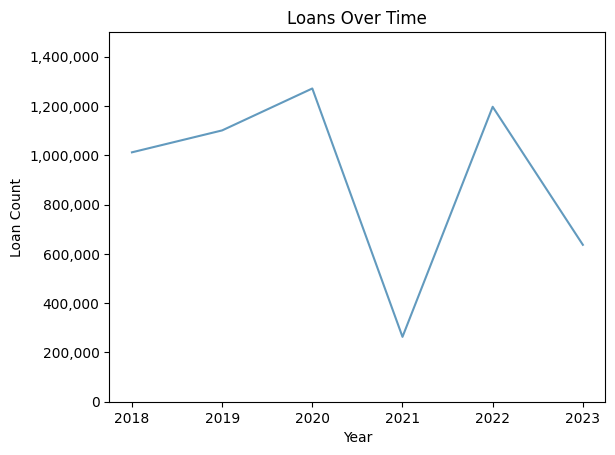

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df.activity_year.value_counts().sort_index().plot(kind='line',color='#629abe')
plt.title('Loans Over Time')
plt.xlabel('Year')
plt.ylabel('Loan Count')

#to fix y-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylim(bottom=0,top=1500000)
plt.show()

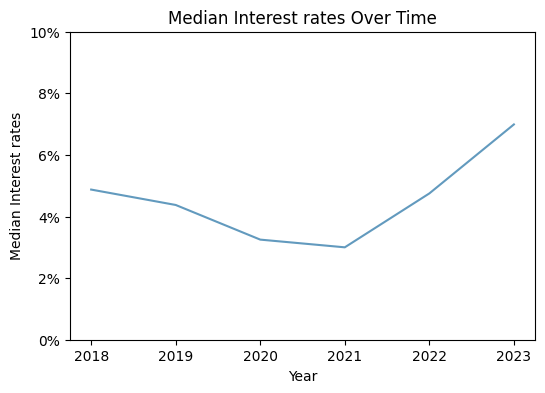

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
int_year=df.groupby('activity_year')['interest_rate'].median()
plt.figure(figsize=(6,4))
int_year.plot(kind='line',color='#629abe')
plt.title('Median Interest rates Over Time')
plt.xlabel('Year')
plt.ylabel('Median Interest rates')

plt.ylim(bottom=0, top=10)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))
plt.show()

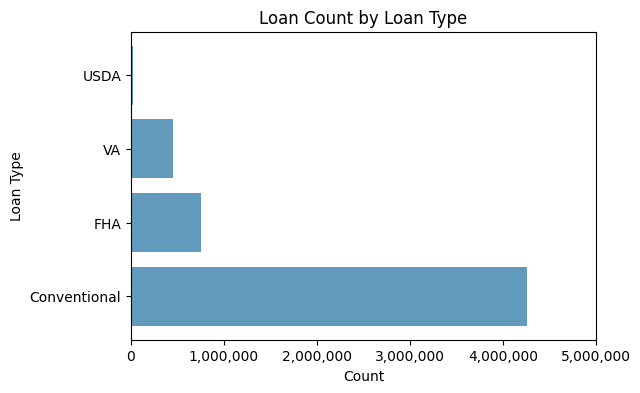

In [69]:
import matplotlib.pyplot as plt

loan_counts = df['loan_type_d'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.barh(loan_counts.index, loan_counts.values, color='#629abe')

plt.title('Loan Count by Loan Type')
plt.ylabel('Loan Type')
plt.xlabel('Count')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim(0,5_000_000)
plt.show()


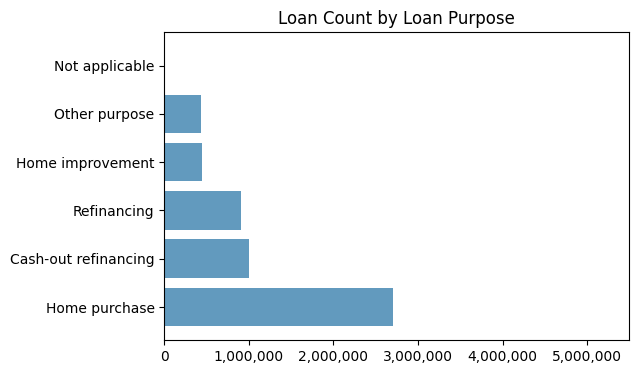

In [70]:

loan_counts = df['loan_purpose_d'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.barh(loan_counts.index, loan_counts.values, color='#629abe')

plt.title('Loan Count by Loan Purpose')
#plt.ylabel('Loan Purpose')
#plt.xlabel('Count')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlim(0,5_500_000)
plt.show()


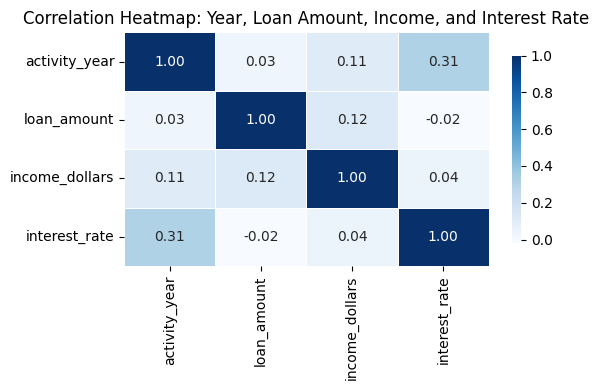

In [71]:


# Select key columns
cols = ['activity_year', 'loan_amount', 'income_dollars', 'interest_rate']

# Compute correlation 
corr = df[cols].corr(numeric_only=True)

# Plot 
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap: Year, Loan Amount, Income, and Interest Rate')
plt.tight_layout()
plt.show()


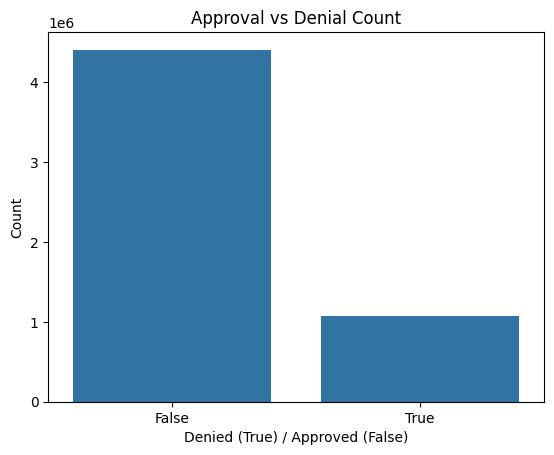

In [90]:
sns.countplot(data=df, x='is_denied')
plt.title("Approval vs Denial Count")
plt.xlabel("Denied (True) / Approved (False)")
plt.ylabel("Count")
plt.show()


### Saving The data

In [98]:
df.to_csv("capstone.csv", index=False)

### Cheking the quantiles

In [113]:
df['income_dollars'].quantile([0.25, 0.5, 0.75, 0.9])

0.25     55000.0
0.50     85000.0
0.75    134000.0
0.90    213000.0
Name: income_dollars, dtype: float64